In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
diab = pd.read_csv("S:\PROJECT dataset\datasets\diabetes.csv")

In [3]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diab.shape

(768, 9)

In [6]:
diab.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
686,3,130,64,0,0,23.1,0.314,22,0


In [7]:
diab.isnull().values.any()

False

# Data Analysis

In [8]:
diab.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
diab["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
diab.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
diab["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [12]:
diab.groupby("Pregnancies")["Outcome"].value_counts()

Pregnancies  Outcome
0            0           73
             1           38
1            0          106
             1           29
2            0           84
             1           19
3            0           48
             1           27
4            0           45
             1           23
5            0           36
             1           21
6            0           34
             1           16
7            1           25
             0           20
8            1           22
             0           16
9            1           18
             0           10
10           0           14
             1           10
11           1            7
             0            4
12           0            5
             1            4
13           0            5
             1            5
14           1            2
15           1            1
17           1            1
Name: Outcome, dtype: int64

In [13]:
d= diab.groupby("Pregnancies")["Outcome"].agg("count")

In [14]:
(diab.groupby("Pregnancies")["Outcome"].value_counts()/d)*100

Pregnancies  Outcome
0            0           65.765766
             1           34.234234
1            0           78.518519
             1           21.481481
2            0           81.553398
             1           18.446602
3            0           64.000000
             1           36.000000
4            0           66.176471
             1           33.823529
5            0           63.157895
             1           36.842105
6            0           68.000000
             1           32.000000
7            1           55.555556
             0           44.444444
8            1           57.894737
             0           42.105263
9            1           64.285714
             0           35.714286
10           0           58.333333
             1           41.666667
11           1           63.636364
             0           36.363636
12           0           55.555556
             1           44.444444
13           0           50.000000
             1           50.000000

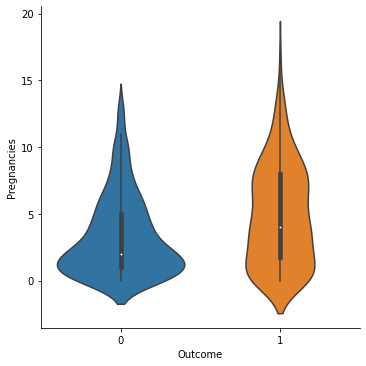

In [15]:
sns.catplot(x="Outcome",y="Pregnancies",data=diab,kind="violin");

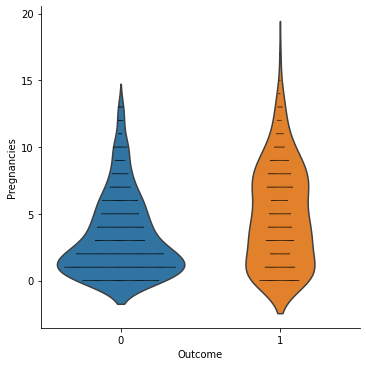

In [16]:
g = sns.catplot(x="Outcome",y="Pregnancies",data=diab,kind="violin",inner=None)
sns.swarmplot(x="Outcome",y="Pregnancies",data=diab,size=1,ax=g.ax,color="k");

In [17]:
diab[diab["BMI"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [18]:
diab[diab["BMI"]==0].shape

(11, 9)

In [19]:
diab[diab["BloodPressure"]==0].shape

(35, 9)

In [20]:
diab[diab["Insulin"]==0].shape

(374, 9)

In [21]:
diab[diab["SkinThickness"]==0].shape

(227, 9)

In [22]:
diab.groupby(["Pregnancies","BMI"])["Age"].value_counts()

Pregnancies  BMI   Age
0            0.0   21     2
                   25     1
             18.4  27     1
             20.0  22     1
             21.0  21     1
                         ..
13           43.4  42     1
14           33.6  38     1
             36.6  46     1
15           37.1  43     1
17           40.9  47     1
Name: Age, Length: 750, dtype: int64

In [23]:
diab.groupby("BloodPressure")["Outcome"].value_counts()

BloodPressure  Outcome
0              0          19
               1          16
24             0           1
30             0           1
               1           1
                          ..
108            1           1
110            1           2
               0           1
114            1           1
122            0           1
Name: Outcome, Length: 82, dtype: int64

In [24]:
(diab["BloodPressure"]==0).value_counts()

False    733
True      35
Name: BloodPressure, dtype: int64

In [25]:
diab.groupby(["BloodPressure","Age"])["Outcome"].value_counts()

BloodPressure  Age  Outcome
0              21   0          1
               22   0          3
               23   0          2
                    1          1
               24   0          1
                              ..
110            26   1          1
               37   0          1
               54   1          1
114            44   1          1
122            27   0          1
Name: Outcome, Length: 555, dtype: int64

In [26]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
diab.groupby(["Age"])["Outcome"].value_counts().tail(10)

Age  Outcome
65   0          3
66   0          2
     1          2
67   0          2
     1          1
68   0          1
69   0          2
70   1          1
72   0          1
81   0          1
Name: Outcome, dtype: int64

In [50]:
diab[(diab["BMI"]>20)&(diab["Outcome"]==1)]["Outcome"].value_counts()

1    266
Name: Outcome, dtype: int64

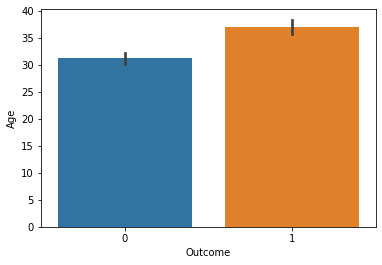

In [28]:
sns.barplot(y="Age",x="Outcome",data=diab);

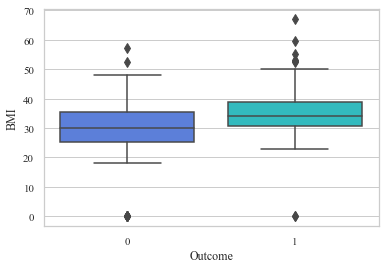

In [29]:
sns.set_theme(style="whitegrid",font="Times New Roman", palette='turbo')
sns.boxplot(y="BMI",x="Outcome",data=diab,fliersize=7);

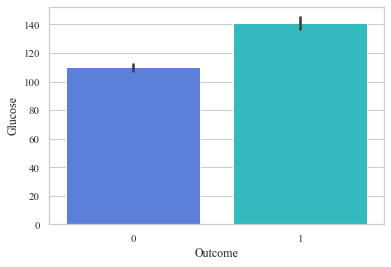

In [52]:
sns.barplot(x="Outcome", y="Glucose" , data=diab);

In [57]:
diab["DiabetesPedigreeFunction"].value_counts()

0.254    6
0.258    6
0.259    5
0.238    5
0.207    5
        ..
0.886    1
0.804    1
1.251    1
0.382    1
0.375    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

In [61]:
diab.groupby(["Outcome"])["DiabetesPedigreeFunction"].max()

Outcome
0    2.329
1    2.420
Name: DiabetesPedigreeFunction, dtype: float64

In [62]:
diab.groupby(["Outcome"])["DiabetesPedigreeFunction"].min()

Outcome
0    0.078
1    0.088
Name: DiabetesPedigreeFunction, dtype: float64

In [67]:
diab[(diab["Insulin"]<=70) & (diab["Outcome"]==1)]["Outcome"].value_counts()

1    145
Name: Outcome, dtype: int64

## Using algorithms

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [30]:
#seperating the data and label
X = diab.drop(columns="Outcome",axis=1)
Y = diab["Outcome"]

In [31]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [32]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(X)

StandardScaler()

In [35]:
standardized_data = scaler.transform(X)

In [36]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [37]:
X = standardized_data
Y = diab['Outcome']

In [38]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [41]:
classifier = svm.SVC(kernel='linear')

In [42]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [43]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [44]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [45]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

In [68]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic
